# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [12]:
data_clus = pd.read_csv('dataPreprocessed/clustering.csv')
data_clus.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,BALANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,0.008527,0.048741,0.000000,0.089234,0.00000,0.166667,0.000000,0.083333,0.000000,0.000000,0.068966,0.114094,0.112618,0.113697,0.818182,0.0,12.0
1,0.177028,0.008175,0.014350,0.000000,0.00000,0.083333,0.199999,0.000000,0.000000,0.000000,0.034483,0.140940,0.383248,0.200853,NaN,NaN,NaN
2,0.395230,0.222858,0.000000,0.408007,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.413793,0.288591,0.383663,0.438644,NaN,NaN,NaN
3,0.219806,0.440142,0.593265,0.187073,0.00000,0.333333,0.199999,0.250000,0.000000,0.000000,0.172414,0.919463,0.388896,0.256461,NaN,NaN,NaN
4,0.601107,0.000000,0.000000,0.000000,0.12296,0.000000,0.000000,0.000000,0.187499,0.142857,0.000000,0.382550,0.455552,0.817735,1.000000,0.0,12.0


# Modelling Phase

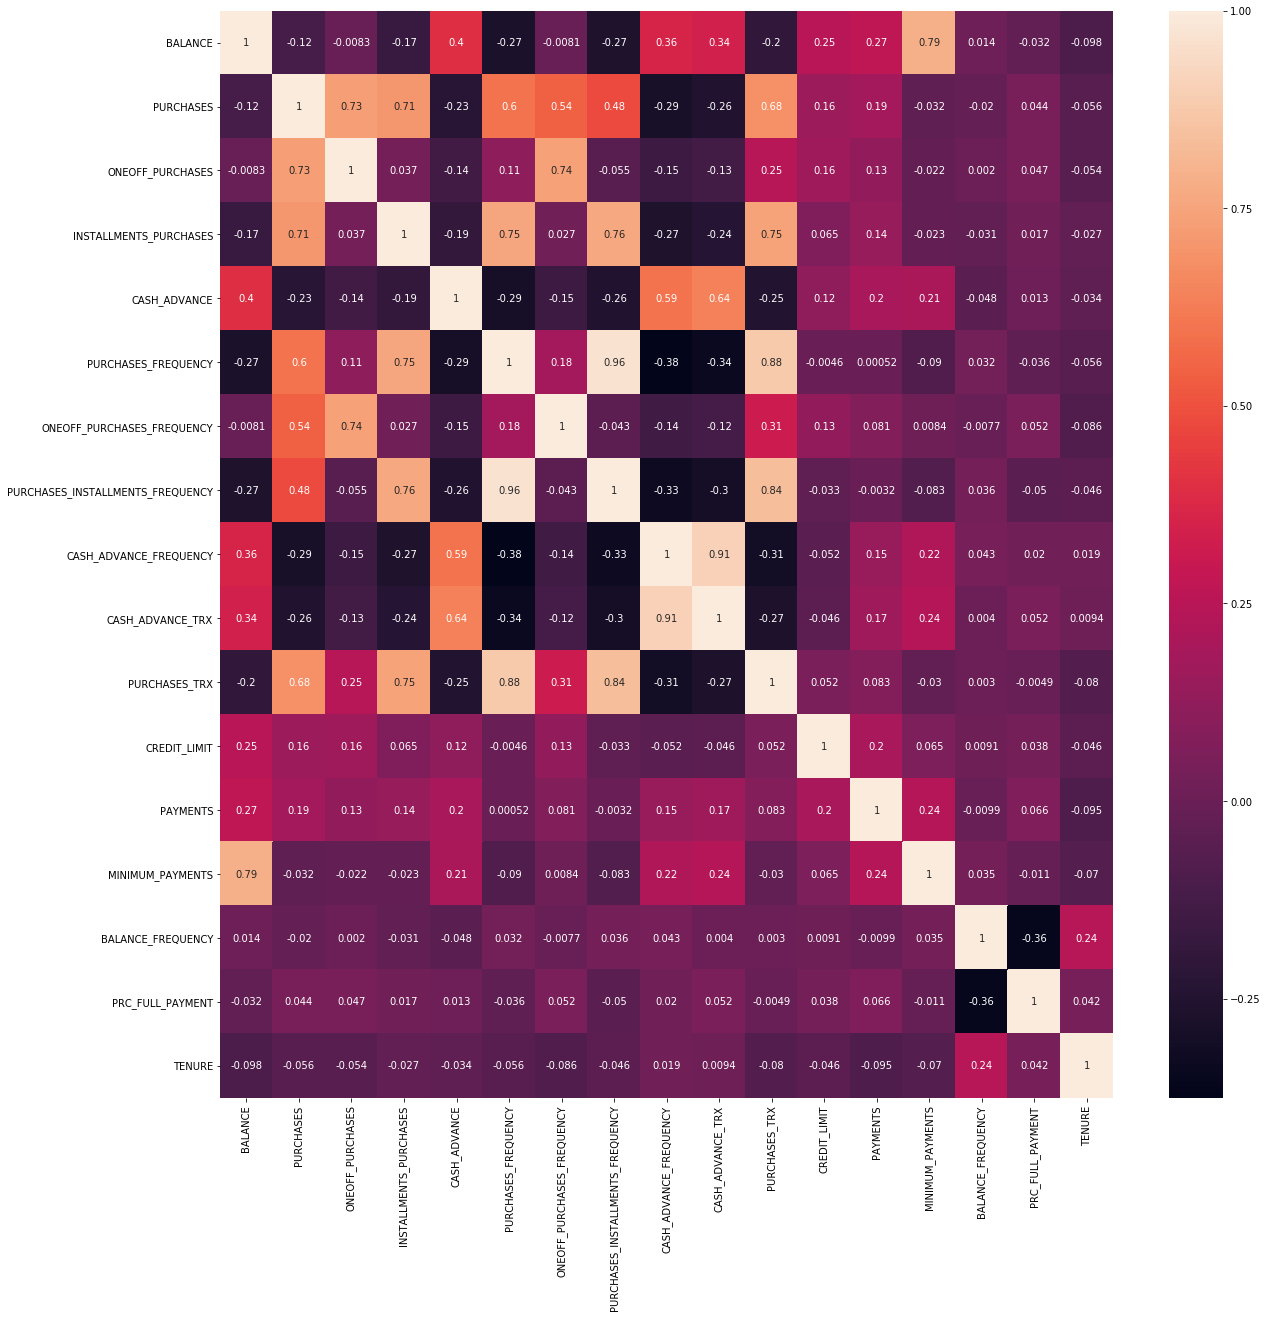

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data_clus.corr(), annot=True)
plt.show()

## Training Phase

Mengambil data yang memiliki korelasi tertinggi yaitu **PURCHASES_INSTALLMENTS_FREQUENCY** dan **PURCHASES_FREQUENCY**

In [14]:
X = data_clus[['PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_FREQUENCY']]
X.head()

,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY
0,0.083333,0.166667
1,0.000000,0.083333
2,1.000000,1.000000
3,0.250000,0.333333
4,0.000000,0.000000


In [15]:
X.isnull().sum()

PURCHASES_INSTALLMENTS_FREQUENCY    0
PURCHASES_FREQUENCY                 0
dtype: int64

### K-Means

In [16]:
# Machine learning model 1 training phase
distortions = []
K = range (1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/ X.shape[0])

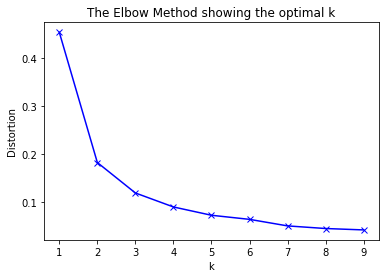

In [17]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Dikarenakan nilai ekstrem terdapat pada K = 2. Maka saya ambil nilai 2,3 dan 4

In [19]:
model_kme = KMeans(n_clusters= 2)
model_kme_2 = KMeans(n_clusters= 3)
model_kme_3 = KMeans(n_clusters= 4)

In [20]:
model_kme.fit(X)
model_kme_2.fit(X)
model_kme_3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
pred_kme = model_kme.predict(X)
pred_kme_2 = model_kme_2.predict(X)
pred_kme_3 = model_kme_3.predict(X)

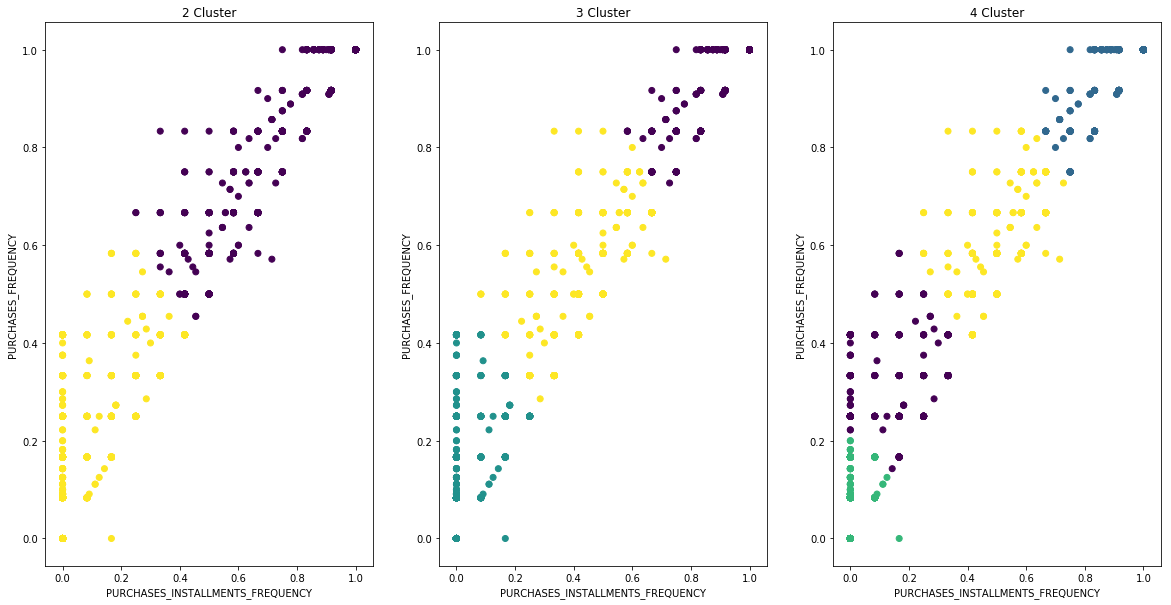

In [29]:
# plt.tight_layout()
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.scatter(data_clus['PURCHASES_INSTALLMENTS_FREQUENCY'], data_clus['PURCHASES_FREQUENCY'], c = pred_kme)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('2 Cluster')

plt.subplot(132)
plt.scatter(data_clus['PURCHASES_INSTALLMENTS_FREQUENCY'], data_clus['PURCHASES_FREQUENCY'], c = pred_kme_2)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('3 Cluster')

plt.subplot(133)
plt.scatter(data_clus['PURCHASES_INSTALLMENTS_FREQUENCY'], data_clus['PURCHASES_FREQUENCY'], c = pred_kme_3)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('4 Cluster')

plt.show()

### DBSCAN

In [75]:
model_dbs = DBSCAN(eps=0.08, min_samples=5)

In [76]:
model_dbs.fit_predict(X)

array([0, 1, 2, ..., 4, 4, 1], dtype=int64)

In [77]:
labels = model_dbs.labels_

In [78]:
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)

In [79]:
n_clusters_

6

In [80]:
core_samples_mask = np.zeros_like(model_dbs.labels_, dtype=bool)
core_samples_mask[model_dbs.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

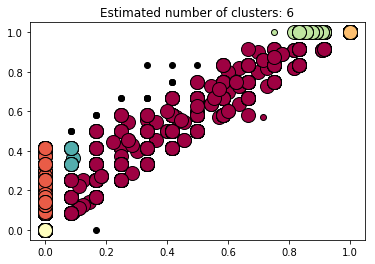

In [92]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip (unique_labels, colors) :
  if k == -1:
    
        # Black used for noise.
    col = [0, 0, 0, 1]

  class_member_mask = (labels == k)

  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o',
        markerfacecolor=tuple(col), markeredgecolor='k',
        markersize=14)

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Testing Phase

In [ ]:
# Machine learning model 1 testing phase

In [ ]:
# And keep on...

## Optimization Phase

In [ ]:
# Machine learning model 1 optimization phase

In [ ]:
# And keep on...

## Ensamble Phase (optional)

<hr>

# Evaluation

From data modeling that has been done, please state your evaluation/conclusion related to:

1. Our dataset behaviour (how our prediction characteristic & trend)
2. Model Analysis, including their parameter & performance
3. Result after optimization phase
4. Relate your analysis with EDA & preprocessing that you have done before
5. Another improvement that must be done to increase your model performance

In [ ]:
# Dataset behaviour

In [ ]:
# Model analysis

In [ ]:
# Result after optimization phase

In [ ]:
# EDA & preprocessing relation analysis

In [ ]:
# Another improvement